# <b><span style='color:#0386f7de'>|</span> Idan Chen project - Personal Key Indicators of Heart Disease</b>


![logo](logo.png)

# <b><span style='color:#0386f7de'>|</span> Table Of Contecnts:</b>

 * ### [Imports](#Imports)
 * ### [Data Preparation](#Data_Preparation)
     * #### [Missing values or outliers](#outliers)
     * #### [Couple visualizations](#vis)
     * #### [Find the best columns for ML on HeartDisease based on their Corr](#corr)
     * #### [Dummy variables for categorical variables](#dummy)
     * #### [Imblance](#imblance)
 * ### [Models](#model)
 * ### [Evaluation](#evaluation)
 * ### [Summary](#summary)


# <b><span style='color:#0386f7de'>|</span> Imports <a class="anchor" id="Imports"></a></b>

In [1]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# settings immports
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 40

# Unbalance data imports
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ML imports
from sklearn.model_selection import train_test_split
import sklearn.metrics as met

# configurations imports -> don't forget it Igal :)
%config Completer.use_jedi = False

## <b><span style='color:#0386f7de'>|</span> Data preperation <a class="anchor" id="Data_Preparation"></a></b>

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## <b><span style='color:#0386f7de'>|</span> Missing values or outliers <a class="anchor" id="outliers"></a></b>

In [4]:
df.isna().sum().sum()

0

In [5]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [6]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

## <b><span style='color:#0386f7de'>|</span> Basic visualisations for analysis <a class="anchor" id="vis"></a></b>

#### histplot of SleepTime devided to 24 bins (number of hours per day)

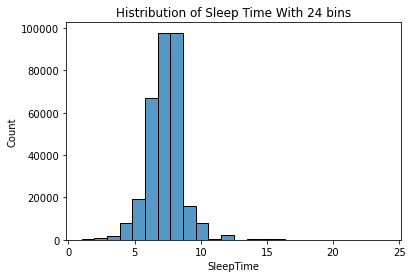

In [7]:
ax = sns.histplot(data=df,x='SleepTime',bins=24)
_ = ax.set_title("Histribution of Sleep Time With 24 bins")

### kdeplot of BMI divided by Heart Disease Label

![BMI](BMI_img.png)

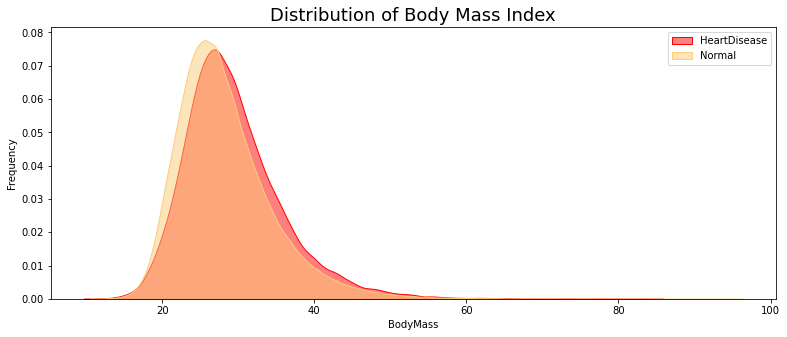

In [8]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()

#### Function that get df and column name and plot countplot with bar labels

In [9]:
def create_count_plot(x_size,y_size, df, column_name):
    fig = plt.figure(figsize=(x_size,y_size))
    plt.title(column_name,fontsize=15)
    ax = sns.countplot(x=df[column_name],
                       order=df[column_name].value_counts(ascending=False).index);
    abs_values = df[column_name].value_counts(ascending=False).values
    _ = ax.bar_label(container=ax.containers[0], labels=abs_values)

#### count plot of Age Category

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

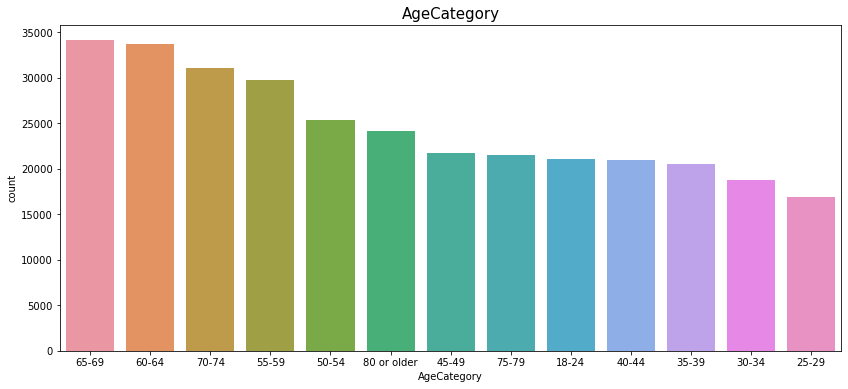

In [10]:
create_count_plot(x_size= 14, y_size = 6,df=df, column_name="AgeCategory")

## <b><span style='color:#0386f7de'>|</span> Find the best columns for ML on HeartDisease based on their Corr <a class="anchor" id="corr"></a></b>

<AxesSubplot:>

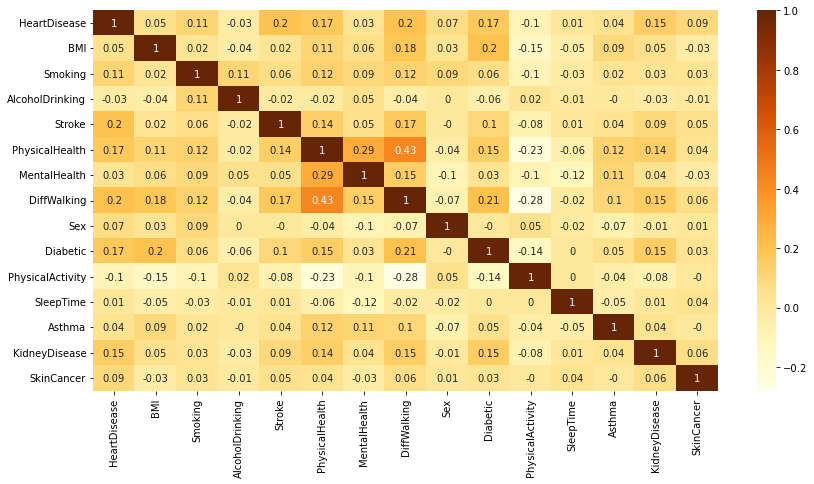

In [11]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

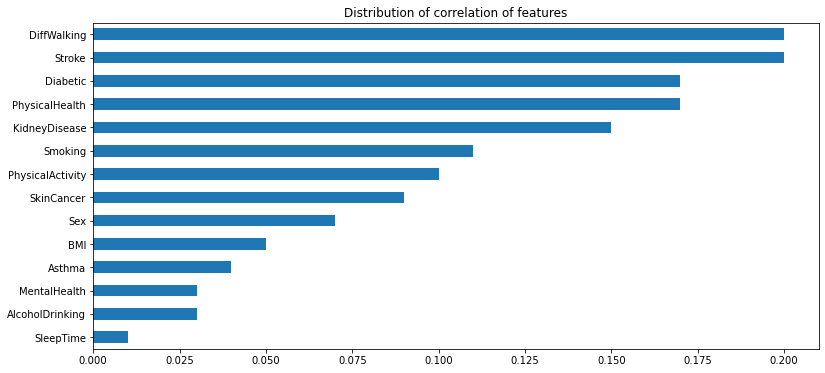

In [12]:
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

### After Reaserch by using catplot and pandas corr I Found the suits colums are:
- Smoking   
- Stroke
- PhysicalHealth
- DiffWalking
- Sex
- AgeCategory
- Diabetic
- PhysicalActivity	
- GenHealth

By the way - It's very intersting to figure out that Sleep Time doesn't effect Heart Disease

In [13]:
final_columns = ["Smoking","Stroke","PhysicalHealth","DiffWalking","Sex","AgeCategory","Diabetic","PhysicalActivity","GenHealth","HeartDisease"]

In [14]:
df = df[final_columns]

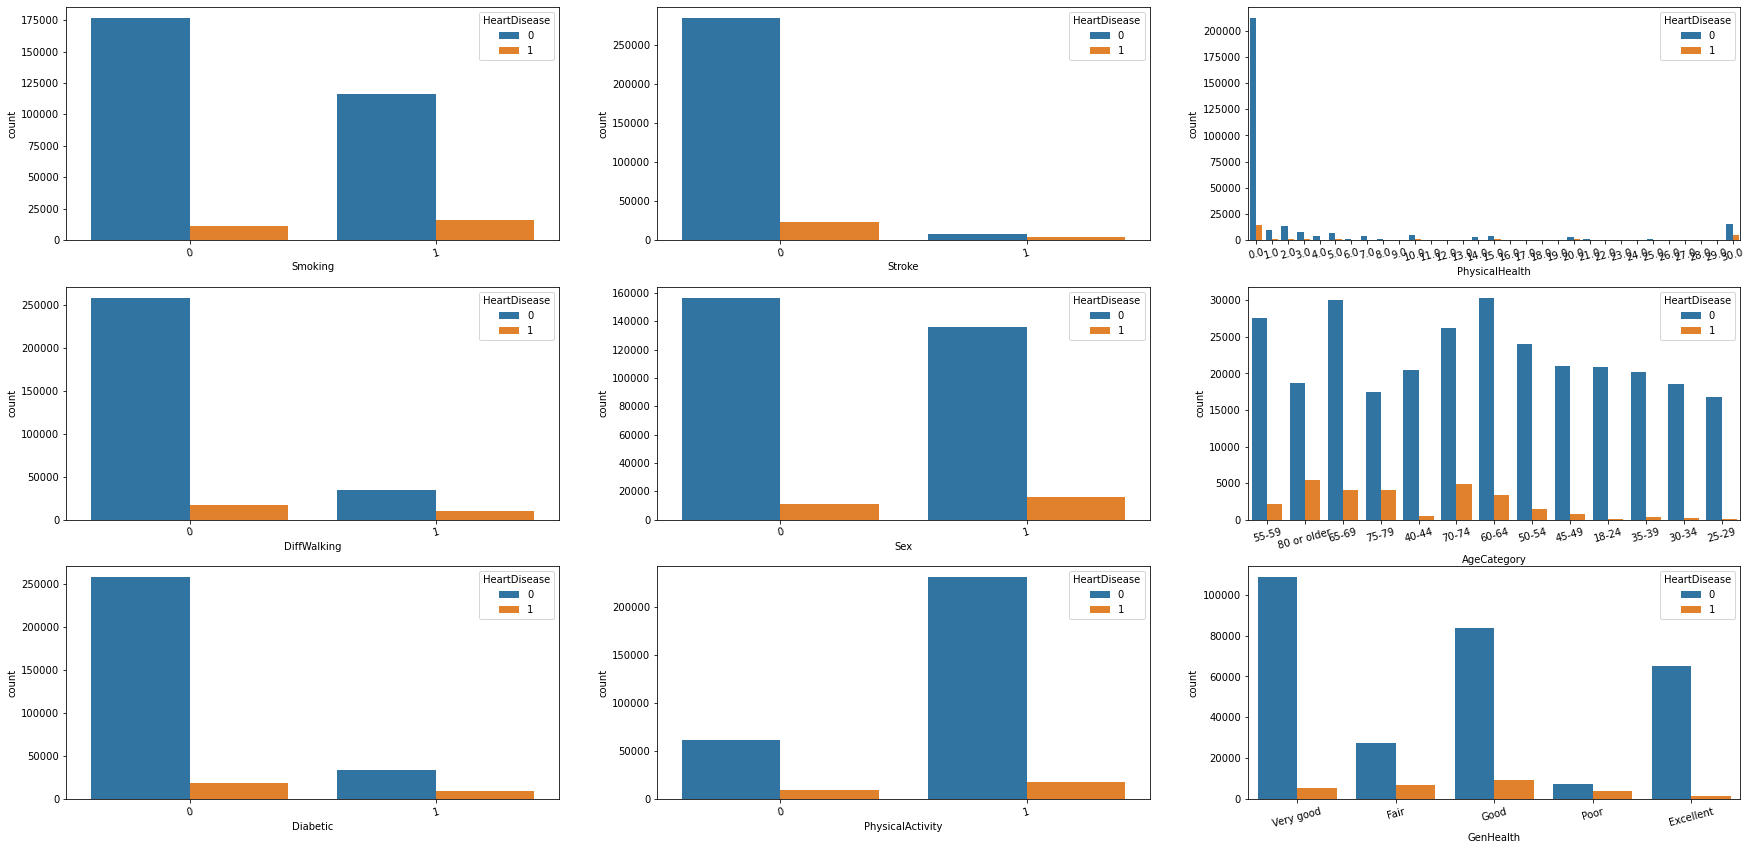

In [16]:
plt.figure(figsize=(30,30))
for i in enumerate(final_columns[:-1]):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],hue='HeartDisease',data=df)
    plt.xticks(rotation=15)

## <b><span style='color:#0386f7de'>|</span> Dummy variables for categorical variables <a class="anchor" id="dummy"></a></b>

In [17]:
lst_of_dummy_variables = ['HeartDisease','Smoking','Stroke','DiffWalking','Sex','AgeCategory','Diabetic','PhysicalActivity','GenHealth']

In [18]:
df = pd.get_dummies(data=df,columns=lst_of_dummy_variables,drop_first=True)

In [19]:
df.head(1)

,PhysicalHealth,HeartDisease_1,Smoking_1,Stroke_1,DiffWalking_1,Sex_1,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Diabetic_1,PhysicalActivity_1,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1


## <b><span style='color:#0386f7de'>|</span>  Balance the data <a class="anchor" id="imblance"></a></b>

#### count plot of Heart Disease

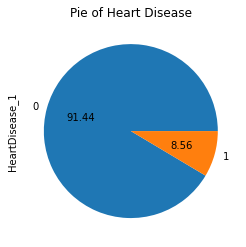

In [21]:
ax= df["HeartDisease_1"].value_counts().plot.pie(autopct='%.2f')
_= ax.set_title("Pie of Heart Disease")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartDisease_1',axis=1), df['HeartDisease_1'], test_size=0.33, random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train)

In [ ]:
rus = RandomUnderSampler()

In [ ]:
Counter(y_rus)

In [ ]:
df =  pd.concat([X_rus,y_rus],axis=1)

### see the data after the Preparation

In [ ]:
df.head(1)

# <b><span style='color:#0386f7de'>|</span>  Model Training <a class="anchor" id="model"></a></b>

# <b><span style='color:#0386f7de'>|</span>   Evaluation <a class="anchor" id="evaluation"></a></b>

# <b><span style='color:#0386f7de'>|</span>  SUMMARY <a class="anchor" id="summary"></a></b>

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes.</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. Typically also used to display warning messages.
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> This alert box indicates a successful or positive action.
</div>

<div class="alert alert-block alert-danger">
<b>Danger:</b> This alert box indicates a dangerous or potentially negative action.
</div>

<code style="background:yellow;color:black">Useful for highlighting to grab the attention of the reader towards certain points.</code>


Do not forget to buy <mark>milk</mark> today.

<nav>
<a href=”https://www.google.com">LinkedIn</a> |
<a href=”/css/”>Github</a> |
<a href=”/js/”>Medium</a> |
</nav>

***

Here is some important text!

***

# Finish!

In [ ]:
for i in range(1,9):
    c = itertools.combinations('ABCDEFGI',i)
    for item in c:
#         print(item)
#         print(list(item))
        X_train, X_test, y_train, y_test = sm.train_test_split(
                df[list(item)], 
                df.Target, 
                test_size=0.33, 
                random_state=101)
        model = sl.LinearRegression()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if score > 0.95:
            print(list(item), score)